In [ ]:
import numpy as np


class SGD:
    """확률적 경사 하강법（Stochastic Gradient Descent）"""
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.Keys():
            params[key] -= self.lr * grads[key]

In [ ]:
class Momentum:
    """모멘텀 SGD"""
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 속도 누적
            params[key] += self.v[key]

In [ ]:
class AdaGrad:
    """AdaGrad"""
    def __init(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [ ]:
class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            # 기존 속도에 모멘텀을 곱해 반영
            self.v[key] *= self.momentum
            # 새로운 기울기(gradient)를 반영 (여기까진 기존 모멘텀)
            self.v[key] -= self.lr * grads[key]
            # 파라미터 업데이트: 모멘텀 제곱항 반영
            params[key] += self.momentum * self.momentum * self.v[key]
            # 파라미터 업데이트: 기울기 항과 모멘텀 계수 반영
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

In [ ]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] *= self.decay_rate # 과거의 기울기를 서서히 줄이는 역할
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

# 6.2 가중치의 초깃값

[8.04186404e-01 4.03038150e-03 4.84497010e-13 ... 1.08447585e-03
 4.90106676e-13 1.00000000e+00]
[9.99999994e-01 1.00000000e+00 1.00000000e+00 ... 9.87367022e-01
 1.67227607e-11 1.00000000e+00]
[5.09005741e-04 1.00000000e+00 1.24391511e-23 ... 9.46675208e-23
 9.73326508e-01 7.95904616e-08]
[1.03114119e-03 9.99998913e-01 1.00000000e+00 ... 1.00000000e+00
 1.19454028e-09 4.03566151e-15]
[1.79418350e-03 1.00000000e+00 1.67909585e-04 ... 1.00000000e+00
 2.11352364e-02 9.99982751e-01]


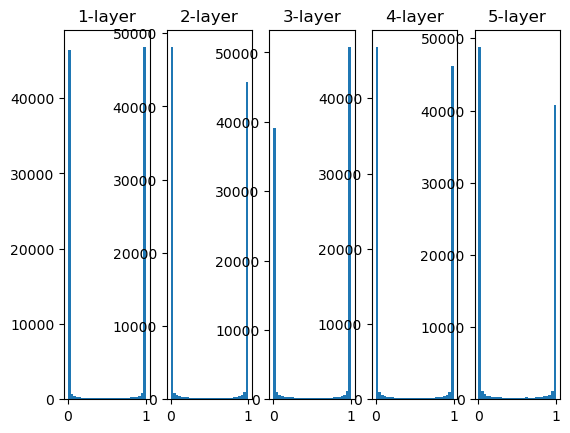

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    # 가중치 초기화: 평균 0, 표준편차 1인 정규분포로 가중치 생성
    w = np.random.randn(node_num, node_num) * 4

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = sigmoid(a)  # 가중합 a에 시그모이드 함수 적용


    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    print(a.flatten())
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

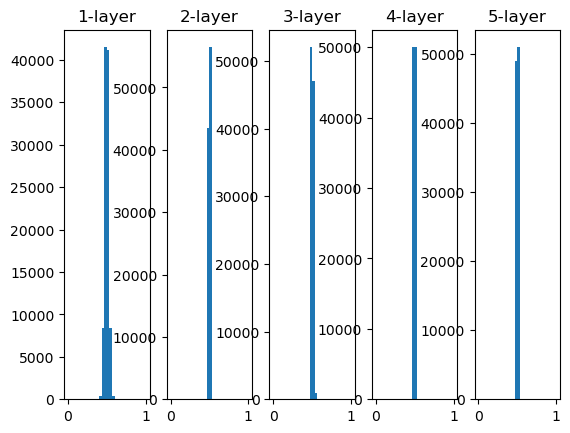

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    # 가중치 초기화: 평균 0, 표준편차 0.01인 정규분포로 가중치 생성
    w = np.random.randn(node_num, node_num) * 0.01

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = sigmoid(a)  # 가중합 a에 시그모이드 함수 적용

    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

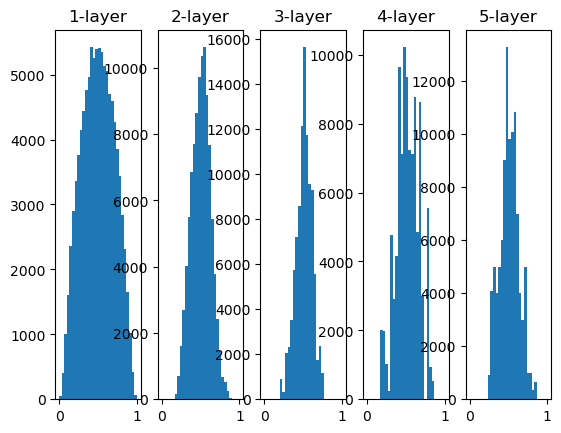

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

def tanh(x):
    p_exp_x = np.exp(x)
    m_exp_x = np.exp(-x)
    return np.tanh(x)
    return (p_exp_x -m_exp_x) / (p_exp_x + m_exp_x)

def relu(x):
    return np.maximum(0, x)
# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = sigmoid(a)  # 가중합 a에 시그모이드 함수 적용

    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

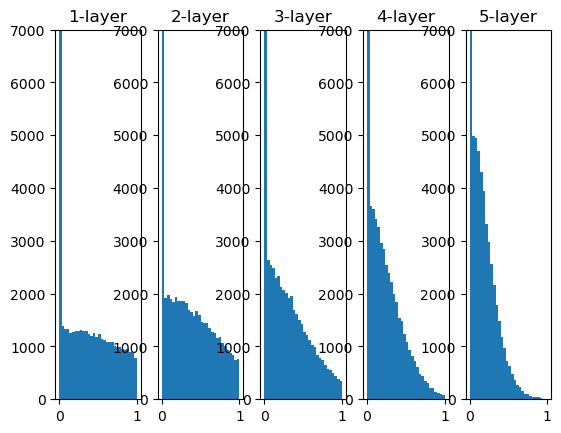

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)
# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    w = np.random.randn(node_num, node_num) /  np.sqrt(node_num)

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = relu(a)  # 가중합 a에 시그모이드 함수 적용

    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.ylim(0, 7000)  # y축의 최대값을 7000으로 설정
    plt.yticks(np.arange(0, 7001, 1000))  # y축 눈금을 1000 단위로 설
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

print(sigmoid(40))
print(sigmoid(-4000))

1.0
0.0


/var/folders/ks/g557dmv54qsd_xmq2wm8fhhm0000gn/T/ipykernel_98845/1207558671.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환


In [88]:
import numpy as np

class BatchNormalization:
    """
    배치 정규화(Batch Normalization) 구현.
    논문: http://arxiv.org/abs/1502.03167
    """

    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        """
        초기화 메서드.
        :param gamma: 스케일링 파라미터 (학습 가능)
        :param beta: 시프트 파라미터 (학습 가능)
        :param momentum: 지수 이동 평균을 계산할 때 사용할 모멘텀 값
        :param running_mean: 학습 시 평균의 이동 평균
        :param running_var: 학습 시 분산의 이동 평균
        """
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None  # 입력 데이터의 형태 (2D: FC, 4D: Conv)

        # 추론 단계에서 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var

        # Backward에서 사용할 중간 결과 저장
        self.batch_size = None
        self.xc = None  # x - mean
        self.std = None  # 표준편차
        self.dgamma = None  # gamma의 기울기
        self.dbeta = None  # beta의 기울기

    def forward(self, x, train_flg=True):
        """
        순전파 수행.
        :param x: 입력 데이터 (N, C, H, W) or (N, D)
        :param train_flg: 학습(True)인지 추론(False)인지 구분
        """
        self.input_shape = x.shape

        # 입력이 2차원이 아닐 경우(Conv Layer), 일괄적으로 2차원 형태로 변환
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)  # (N, C*H*W)

        # 실질적인 순전파 메서드 호출
        out = self.__forward(x, train_flg)

        # 입력 형태로 되돌려서 반환
        return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg):
        """
        내부 순전파 메서드 (Batch Norm의 핵심 동작).
        """
        if self.running_mean is None:
            # 평균과 분산 초기화 (초기 값은 0)
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)

        if train_flg:  # 학습 모드
            # 1. 배치 평균과 분산 계산
            mu = x.mean(axis=0)  # 배치 평균 (axis=0: 각 특성에 대한 평균)
            xc = x - mu  # 평균을 뺀 값
            var = np.mean(xc**2, axis=0)  # 분산
            std = np.sqrt(var + 1e-7)  # 표준편차 (분모의 안정성을 위해 작은 값 더함)
            xn = xc / std  # 정규화된 값

            # 2. 중간 데이터 저장 (Backward에서 사용)
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std

            # 3. 이동 평균 업데이트 (추론 시 사용)
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
        else:  # 추론 모드
            # 이동 평균을 사용하여 정규화
            xc = x - self.running_mean
            xn = xc / np.sqrt(self.running_var + 1e-7)

        # 4. 스케일링과 시프트 적용
        out = self.gamma * xn + self.beta
        return out

    def backward(self, dout):
        """
        역전파 수행.
        :param dout: 다음 층에서 전파된 기울기
        """
        # 입력이 2차원이 아니면 다시 변환
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        # 실질적인 역전파 수행
        dx = self.__backward(dout)

        # 입력 형태로 되돌려서 반환
        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        """
        내부 역전파 메서드 (Batch Norm의 핵심 Backward 동작).
        """
        dbeta = dout.sum(axis=0)  # beta에 대한 기울기
        dgamma = np.sum(self.xn * dout, axis=0)  # gamma에 대한 기울기

        dxn = self.gamma * dout  # 정규화된 입력에 대한 기울기
        dxc = dxn / self.std  # 평균 뺀 값에 대한 기울기
        dstd = -np.sum((dxn * self.xc) / (self.std**2), axis=0)  # 표준편차에 대한 기울기
        dvar = 0.5 * dstd / self.std  # 분산에 대한 기울기

        dxc += (2.0 / self.batch_size) * self.xc * dvar  # 평균을 뺀 값에 대한 추가 기울기
        dmu = np.sum(dxc, axis=0)  # 평균에 대한 기울기
        dx = dxc - dmu / self.batch_size  # 입력 x에 대한 기울기

        # 기울기 저장
        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx

2


In [85]:
print(3)

3


3
wd: 60.22249144149007
epoch:0, train acc:0.10666666666666667, test acc:0.098
wd: 60.09942818700381
wd: 59.97727858451107
wd: 59.85514898040891
epoch:1, train acc:0.10666666666666667, test acc:0.0979
wd: 59.73348977181804
wd: 59.61249443839177
wd: 59.492072638311555
epoch:2, train acc:0.11333333333333333, test acc:0.0965
wd: 59.37178164498809
wd: 59.252466728919
wd: 59.13352307746102
epoch:3, train acc:0.11666666666666667, test acc:0.0985
wd: 59.01482537441214
wd: 58.896172756616274
wd: 58.7784758002233
epoch:4, train acc:0.12333333333333334, test acc:0.099
wd: 58.66039733716215
wd: 58.54341467093163
wd: 58.42590261165468
epoch:5, train acc:0.12333333333333334, test acc:0.1036
wd: 58.309189237631784
wd: 58.19255594493908
wd: 58.07623595161404
epoch:6, train acc:0.14666666666666667, test acc:0.1136
wd: 57.96000622811673
wd: 57.8440195292146
wd: 57.72870743820463
epoch:7, train acc:0.18666666666666668, test acc:0.1318
wd: 57.613311875681575
wd: 57.49849625600436
wd: 57.38396616319204
ep

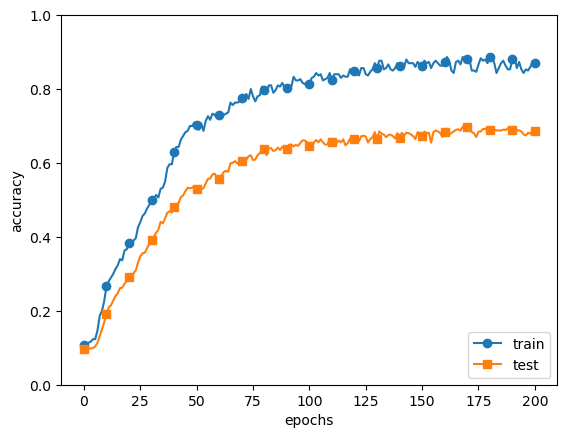

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
import importlib
import common.multi_layer_net
importlib.reload(common.multi_layer_net)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flag=True):
        if train_flag:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.maxk
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

train loss:2.3165607673742072
=== epoch:1, train acc:0.07666666666666666, test acc:0.0812 ===
train loss:2.301658125792003
train loss:2.304738108841955
train loss:2.341413597887984
=== epoch:2, train acc:0.08666666666666667, test acc:0.0852 ===
train loss:2.309898853668678
train loss:2.306255596672877
train loss:2.3165734832248073
=== epoch:3, train acc:0.09666666666666666, test acc:0.0871 ===
train loss:2.3026635762990573
train loss:2.3093141682456433
train loss:2.2942902454794356
=== epoch:4, train acc:0.1, test acc:0.0903 ===
train loss:2.2848516721833803
train loss:2.2965798789470866
train loss:2.2736859589821528
=== epoch:5, train acc:0.11666666666666667, test acc:0.0949 ===
train loss:2.284165323035644
train loss:2.2696100206014456
train loss:2.2743905995544953
=== epoch:6, train acc:0.11666666666666667, test acc:0.099 ===
train loss:2.284442510384053
train loss:2.270967479847311
train loss:2.279254444368597
=== epoch:7, train acc:0.11666666666666667, test acc:0.1023 ===
train lo

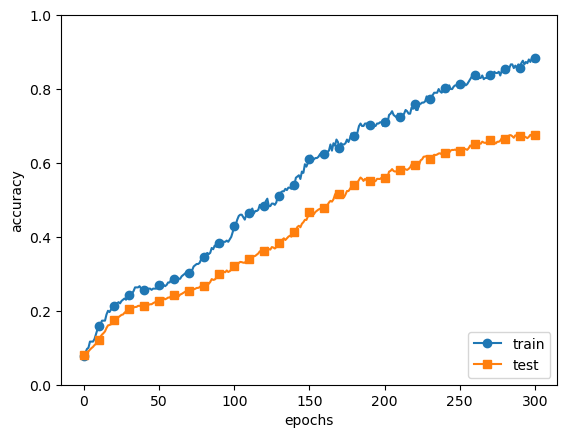

In [106]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [129]:

import pandas
print(pandas.__file__)

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)